# 야구선수 연봉 예측

### index
1. 데이터 수집
2. 데이터 전처리
3. 데이터 매핑
4. 데이터 분석
5. 모델 훈련 및 예측

# 1. 데이터 수집

## 투수 기록 데이터
- 1983년 ~ 1988년의 투수 데이터 (최동원 선수의 롯데시절)
- 2015년 ~ 2020년의 투수 데이터
- 선발/마무리 데이터 필요
    - 투수 데이터 URL (1983년 ~ 1988년) : http://www.kbreport.com/history/pitcher/main
            - 해당 URL에서는 1982년 ~ 2012년까지의 데이터가 존재한다.
        - 2015년 ~ 2020년 데이터를 확인하려면 아래 URL 활용
    - 투수 데이터 URL (1983년 ~ 1988년) : http://www.kbreport.com/leader/pitcher/main

In [2]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from bs4 import BeautifulSoup as bs
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from tqdm import tqdm
from time import sleep

warnings.filterwarnings('ignore')

get_ipython().run_line_magic("matplotlib", "inline")
%matplotlib inline
rc("font", family="Arial Unicode MS")

### 1. KBReport

#### 데이터 파싱 (1983 ~ 1988)

In [2]:
url = 'http://www.kbreport.com/history/pitcher/main'

driver = webdriver.Chrome()

driver.get(url)

In [3]:
# 연도 선택 토글에 들어있는 연도
years = driver.find_element(By.CSS_SELECTOR, "#searchFrm > div.ltb-select-left > div.ltb-sl-1 > select.ltb-season-select")
years_list = years.text.split()

years_list

['2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992',
 '1991',
 '1990',
 '1989',
 '1988',
 '1987',
 '1986',
 '1985',
 '1984',
 '1983',
 '1982']

- 필요한 연도는 1983 ~ 1988이므로 years_list에서 해당되지 않는 연도는 없애주자.

In [4]:
years_list = years_list[-7:-1]

years_list

['1988', '1987', '1986', '1985', '1984', '1983']

- years_list를 반복문을 돌면서 데이터 파싱

In [8]:
pitcher_data = []

for year in tqdm(years_list) :
    # 연도 선택 토글
    year_toggle = Select(driver.find_element(By.CSS_SELECTOR, "#searchFrm > div.ltb-select-left > div.ltb-sl-1 > select.ltb-season-select"))    
    year_toggle.select_by_value(str(year))
    # "결과" 선택 버튼
    result_btn = driver.find_element(By.CSS_SELECTOR, "#searchFrm > div.ltb-select-right > button")
    result_btn.click()
    sleep(0.1)

    # Page Row를 100개로 맞추기
    page_row = Select(driver.find_element(By.CSS_SELECTOR, "#resultListDiv > div.page-row-box > select"))
    page_row.select_by_value(str(100))
    sleep(1.0)

    # 선수정보 가져오기
    pitcher_count = len(driver.find_element(By.CSS_SELECTOR, "#resultListDiv > table > tbody").find_elements(By.TAG_NAME, "tr"))

    for i in range(2, pitcher_count+1) :  # 가장 처음 tr 태그는 컬럼명이니 제외
        pitcher_info = driver.find_element(By.CSS_SELECTOR, f"#resultListDiv > table > tbody > tr:nth-child({i})")

        pitcher_info_list = pitcher_info.text.split()
        pitcher_info_list.append(year)
        pitcher_data.append(pitcher_info_list)

    print(pitcher_info_list)

 17%|█▋        | 1/6 [00:03<00:15,  3.10s/it]

['92', '정삼흠', 'MBC', '5', '16', '0', '27', '20', '139.7', '2.77', '3.93', '1.29', '0.297', '67.60', '5.67', '-1.36', '5.49', '5.39', '-1.39', '1988']


 33%|███▎      | 2/6 [00:06<00:12,  3.06s/it]

['88', '김강익', 'OB', '0', '2', '0', '12', '5', '37.0', '0.97', '4.38', '1.70', '0.274', '74.70', '5.11', '-0.47', '6.37', '6.09', '-1.12', '1987']


 50%|█████     | 3/6 [00:09<00:09,  3.08s/it]

['89', '노상수', '롯데', '3', '5', '0', '16', '10', '49.3', '2.92', '3.65', '1.46', '0.328', '71.80', '5.66', '-1.04', '5.29', '5.18', '-1.10', '1986']


 67%|██████▋   | 4/6 [00:11<00:05,  2.90s/it]

['69', '오문현', '미/청', '4', '4', '0', '23', '7', '75.3', '1.91', '2.75', '2.27', '0.309', '74.70', '6.33', '-1.58', '6.63', '6.40', '-2.60', '1985']


 83%|████████▎ | 5/6 [00:14<00:02,  2.80s/it]

['59', '정성만', '삼미', '8', '10', '1', '29', '6', '150.0', '4.02', '4.98', '1.20', '0.267', '72.20', '4.86', '-0.82', '4.73', '4.70', '-1.56', '1984']


100%|██████████| 6/6 [00:17<00:00,  2.85s/it]

['55', '강철원', 'OB', '4', '2', '0', '17', '6', '62.7', '3.02', '3.30', '1.72', '0.288', '68.10', '6.32', '-1.03', '5.42', '5.33', '-1.26', '1983']


In [9]:
len(pitcher_data)

452

- pitcher_data를 value로 하는 데이터프레임 정의
- 컬럼 생성 (1983년도 기준)

In [10]:
# 컬럼 생성 (1983년도 기준)
columns = driver.find_element(By.CSS_SELECTOR, "#resultListDiv > table > tbody > tr:nth-child(1)")

report_columns = columns.text.split()

report_columns

['#',
 '선수명',
 '팀명',
 '승',
 '패',
 '세',
 '경기',
 '선발',
 '이닝',
 '삼진/9',
 '볼넷/9',
 '홈런/9',
 'BABIP',
 'LOB%',
 'ERA',
 'RA9-WAR',
 'FIP',
 'kFIP',
 'WAR']

In [11]:
driver.close()

- report_columns에는 year 정보가 없으니 year 추가

In [12]:
report_columns.append('year')

- 1983 ~ 1988 투수 정보 데이터프레임 생성

In [13]:
pitcher_df_old = pd.DataFrame(data=pitcher_data, columns=report_columns)

pitcher_df_old.head()

,#,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year
0,1,선동열,해태,16,5,10,31,12,178.3,10.09,1.77,0.15,0.269,83.90,1.21,9.55,0.63,1.26,12.18,1988
1,2,윤학길,롯데,18,10,3,35,25,234.0,4.73,2.04,0.35,0.307,73.10,3.15,5.20,2.64,2.73,6.62,1988
2,3,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.90,2.05,2.51,1.48,2.00,3.73,1988
3,4,한희민,빙그레,16,5,5,31,20,188.0,4.93,2.63,0.77,0.293,78.20,3.11,4.11,3.43,3.55,3.00,1988
4,5,오영일,MBC,7,11,2,28,21,176.0,3.27,2.56,0.46,0.323,71.90,3.48,2.09,3.44,3.39,2.86,1988


In [14]:
pitcher_df_old.tail()

,#,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year
447,51,성낙수,삼성,3,2,0,19,9,55.0,3.44,2.13,1.64,0.290,71.60,4.91,-0.63,4.71,4.65,-0.88,1983
448,52,엄평재,해태,0,2,0,13,9,11.0,9.82,13.09,3.27,0.270,59.10,16.36,-1.92,9.11,9.80,-0.88,1983
449,53,이선희,삼성,5,13,0,29,9,127.0,3.97,4.18,1.20,0.261,74.30,3.76,0.26,4.45,4.46,-0.89,1983
450,54,김덕열,롯데,0,1,0,9,5,21.7,3.74,3.74,2.49,0.288,72.80,6.23,-0.66,6.66,6.64,-0.92,1983
451,55,강철원,OB,4,2,0,17,6,62.7,3.02,3.30,1.72,0.288,68.10,6.32,-1.03,5.42,5.33,-1.26,1983


In [15]:
pitcher_df_old.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        452 non-null    object
 1   선수명      452 non-null    object
 2   팀명       452 non-null    object
 3   승        452 non-null    object
 4   패        452 non-null    object
 5   세        452 non-null    object
 6   경기       452 non-null    object
 7   선발       452 non-null    object
 8   이닝       452 non-null    object
 9   삼진/9     452 non-null    object
 10  볼넷/9     452 non-null    object
 11  홈런/9     452 non-null    object
 12  BABIP    452 non-null    object
 13  LOB%     452 non-null    object
 14  ERA      452 non-null    object
 15  RA9-WAR  452 non-null    object
 16  FIP      452 non-null    object
 17  kFIP     452 non-null    object
 18  WAR      452 non-null    object
 19  year     452 non-null    object
dtypes: object(20)
memory usage: 70.8+ KB


- 데이터프레임 저장

In [16]:
pitcher_df_old.to_csv('datas/pitcher_df_old.csv', encoding='utf-8')

In [17]:
pitcher_df_old = pd.read_csv('datas/pitcher_df_old.csv', index_col=0)

pitcher_df_old.head()

,#,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year
0,1,선동열,해태,16,5,10,31,12,178.3,10.09,1.77,0.15,0.269,83.9,1.21,9.55,0.63,1.26,12.18,1988
1,2,윤학길,롯데,18,10,3,35,25,234.0,4.73,2.04,0.35,0.307,73.1,3.15,5.20,2.64,2.73,6.62,1988
2,3,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.73,1988
3,4,한희민,빙그레,16,5,5,31,20,188.0,4.93,2.63,0.77,0.293,78.2,3.11,4.11,3.43,3.55,3.00,1988
4,5,오영일,MBC,7,11,2,28,21,176.0,3.27,2.56,0.46,0.323,71.9,3.48,2.09,3.44,3.39,2.86,1988


#### 데이터 파싱 (2015 ~ 2020)

In [18]:
url = 'http://www.kbreport.com/leader/pitcher/main'

driver = webdriver.Chrome()

driver.get(url)

In [19]:
# 연도 선택 토글에 들어있는 연도
years = driver.find_element(By.CSS_SELECTOR, "#searchFrm > div.ltb-select-left > div.ltb-sl-1 > select.ltb-season-select").find_elements(By.TAG_NAME, "option")

years_list = [year.text.split('-')[1] for year in years]
years_list

['2024',
 '2023',
 '2022',
 '2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011']

- 필요한건 2015년 ~ 2020년이므로 슬라이싱

In [20]:
years_list = years_list[4:10]

years_list

['2020', '2019', '2018', '2017', '2016', '2015']

- years_list 반복문을 돌면서 데이터 파싱
- 1983 ~ 1988 데이터를 얻어올 때와는 다르게 선수가 많아 페이지를 넘어가야하는 것에 유의
- 또한 연도 선택 토글이 시작 시즌, 종료 시즌 2개로 되어있음

In [27]:
pitcher_data = []

for year in tqdm(years_list) :
    # 연도 선택 토글
    year_toggle_start = Select(driver.find_element(By.CSS_SELECTOR, "#searchFrm > div.ltb-select-left > div.ltb-sl-1 > select.ltb-season-select"))
    year_toggle_end = Select(driver.find_element(By.CSS_SELECTOR, "#searchFrm > div.ltb-select-left > div.ltb-sl-1 > select.ltb-season-select2"))
    year_toggle_start.select_by_value(str(year))
    year_toggle_end.select_by_value(str(year))

    # "결과" 선택 버튼
    result_btn = driver.find_element(By.CSS_SELECTOR, "#searchFrm > div.ltb-select-right > button")
    result_btn.click()
    sleep(1.0)

    # Page Row를 100개로 맞추기
    page_row = Select(driver.find_element(By.CSS_SELECTOR, "#resultListDiv > div.page-row-box > select"))
    page_row.select_by_value(str(100))
    sleep(1.0)

    # Page Num
    # 첫 페이지(<<), 이전 페이지(<), 다음 페이지(>), 마지막 페이지(>>) 버튼은 항상 고정이므로 총 page num에서 4개를 빼주기
    page_num = len(driver.find_element(By.CSS_SELECTOR, "#paging").find_elements(By.TAG_NAME, "a")) - 4

    # Page Num 넘기면서 선수정보 가져오기
    for num in range(page_num) :
        # 선수정보 가져오기
        pitcher_count = len(driver.find_element(By.CSS_SELECTOR, "#resultListDiv > table > tbody").find_elements(By.TAG_NAME, "tr"))

        for i in range(2, pitcher_count+1) :  # 가장 처음 tr 태그는 컬럼명이니 제외
            pitcher_info = driver.find_element(By.CSS_SELECTOR, f"#resultListDiv > table > tbody > tr:nth-child({i})")

            pitcher_info_list = pitcher_info.text.split()
            pitcher_info_list.append(year)
            pitcher_data.append(pitcher_info_list)

        print(pitcher_info_list)
        # 다음 페이지(>) 버튼 클릭
        driver.find_element(By.CSS_SELECTOR, "#paging > a.paging-num.next_page").click()
        sleep(1.0)

  0%|          | 0/6 [00:00<?, ?it/s]

['100', '박종기', '두산', '1', '2', '0', '0', '0', '8', '5', '26.0', '6.92', '4.85', '1.04', '0.338', '70.4', '5.54', '5.13', '5.16', '0.36', '0.43', '2020']
['200', '김재열', 'KIA', '0', '1', '0', '2', '0', '14', '0', '17.1', '6.75', '6.23', '1.56', '0.351', '65.1', '7.27', '6.73', '6.96', '-0.04', '-0.31', '2020']
['283', '이형범', '두산', '1', '2', '1', '1', '2', '27', '0', '25.2', '4.56', '5.61', '1.75', '0.294', '63.4', '7.71', '6.94', '7.27', '-0.89', '-0.31', '2020']


 17%|█▋        | 1/6 [00:09<00:47,  9.46s/it]

['20', '이재학', 'NC', '10', '4', '0', '0', '0', '24', '23', '129.2', '6.32', '2.98', '0.42', '0.310', '69.6', '3.82', '3.80', '3.84', '2.53', '2.79', '2019']
['200', '최지광', '삼성', '3', '8', '2', '10', '1', '63', '0', '68.0', '7.94', '5.29', '0.53', '0.316', '73.5', '4.10', '4.25', '4.22', '-0.06', '0.76', '2019']
['257', '김기훈', 'KIA', '3', '6', '0', '0', '0', '19', '16', '79.1', '5.56', '7.37', '1.25', '0.228', '67.7', '5.56', '6.77', '7.07', '-1.13', '0.12', '2019']
['100', '구승민', '롯데', '1', '4', '2', '6', '2', '41', '0', '36.0', '10.75', '5.25', '1.25', '0.377', '64.5', '6.25', '4.32', '3.98', '0.32', '-0.05', '2019']
['200', '최지광', '삼성', '3', '8', '2', '10', '1', '63', '0', '68.0', '7.94', '5.29', '0.53', '0.316', '73.5', '4.10', '4.25', '4.22', '-0.06', '0.76', '2019']


 33%|███▎      | 2/6 [00:22<00:45, 11.37s/it]

['100', '박정배', 'SK', '1', '3', '9', '2', '5', '49', '0', '44.2', '8.87', '2.42', '1.81', '0.326', '66.8', '5.84', '5.29', '5.04', '0.28', '-0.20', '2018']
['200', '류재인', 'NC', '0', '0', '0', '0', '0', '1', '0', '1.2', '10.80', '10.80', '5.40', '0.000', '65.2', '16.20', '18.23', '18.88', '-0.06', '-0.09', '2018']
['260', '신재영', 'Hero', '8', '9', '0', '1', '0', '26', '21', '101.1', '4.71', '2.04', '2.75', '0.304', '69.7', '6.75', '7.62', '7.93', '-0.75', '0.73', '2018']


 50%|█████     | 3/6 [00:31<00:31, 10.36s/it]

['100', '최충연', '삼성', '3', '8', '0', '3', '0', '42', '6', '84.0', '7.93', '5.14', '1.29', '0.366', '63.9', '7.61', '5.83', '5.80', '0.23', '-0.56', '2017']
['200', '보우덴', '두산', '3', '5', '0', '0', '0', '17', '17', '87.1', '5.26', '3.92', '1.55', '0.272', '77.0', '4.64', '6.31', '6.52', '-0.11', '1.93', '2017']
['239', '류희운', 'KT', '4', '4', '0', '0', '0', '24', '14', '81.0', '5.78', '5.89', '2.00', '0.312', '65.3', '7.67', '7.60', '7.81', '-1.01', '-0.68', '2017']


 67%|██████▋   | 4/6 [00:40<00:19,  9.75s/it]

['100', '한승혁', 'KIA', '3', '2', '1', '9', '0', '36', '0', '33.1', '8.37', '5.13', '0.81', '0.351', '68.2', '4.86', '4.90', '4.77', '0.37', '0.80', '2016']
['200', '김성재', '롯데', '0', '0', '0', '0', '0', '6', '0', '3.2', '7.36', '4.91', '4.91', '0.333', '95.2', '7.36', '10.88', '10.88', '-0.06', '0.10', '2016']
['250', '한기주', 'KIA', '4', '3', '1', '1', '1', '29', '5', '56.2', '4.29', '4.76', '1.75', '0.350', '67.6', '7.62', '7.06', '7.43', '-0.92', '-0.19', '2016']


 83%|████████▎ | 5/6 [00:49<00:09,  9.62s/it]

['100', '장진용', 'LG', '1', '3', '0', '0', '0', '11', '9', '32.1', '5.57', '1.95', '1.39', '0.345', '60.4', '6.40', '5.50', '5.61', '0.28', '0.06', '2015']
['200', '임현준', '삼성', '0', '0', '0', '0', '0', '7', '0', '6.1', '8.53', '2.84', '4.26', '0.364', '34.1', '11.37', '8.83', '8.71', '-0.11', '-0.26', '2015']
['244', '송창식', '한화', '8', '7', '0', '11', '0', '64', '10', '109.0', '7.18', '5.28', '2.39', '0.279', '71.5', '6.44', '7.29', '7.42', '-0.86', '1.07', '2015']


100%|██████████| 6/6 [00:58<00:00,  9.76s/it]


In [28]:
len(pitcher_data)

1653

- pitcher_data를 value로 하는 데이터프레임 정의
- 컬럼 생성 (2015년도 기준)

In [29]:
# 컬럼 생성 (1983년도 기준)
columns = driver.find_element(By.CSS_SELECTOR, "#resultListDiv > table > tbody > tr:nth-child(1)")

report_columns = columns.text.split()

report_columns

['#',
 '선수명',
 '팀명',
 '승',
 '패',
 '세',
 '홀드',
 '블론',
 '경기',
 '선발',
 '이닝',
 '삼진/9',
 '볼넷/9',
 '홈런/9',
 'BABIP',
 'LOB%',
 'ERA',
 'FIP',
 'kFIP',
 'FIP-WAR',
 'RA9-WAR']

In [30]:
driver.close()

- report_columns에는 year 정보가 없으니 year 추가

In [31]:
report_columns.append('year')

- 2015 ~ 2020 투수 정보 데이터프레임 생성

In [32]:
pitcher_df_new = pd.DataFrame(data=pitcher_data, columns=report_columns)

pitcher_df_new.head()

,#,선수명,팀명,승,패,세,홀드,블론,경기,선발,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,FIP,kFIP,FIP-WAR,RA9-WAR,year
0,1,스트레일리,롯데,15,4,0,0,0,31,31,...,2.36,0.46,0.278,75.5,2.50,3.01,2.68,8.28,9.43,2020
1,2,알칸타라,두산,20,2,0,0,0,31,31,...,1.36,0.54,0.289,79.0,2.54,3.10,2.84,8.16,9.76,2020
2,3,브룩스,KIA,11,4,0,0,0,23,23,...,1.43,0.24,0.302,75.5,2.50,2.72,2.48,6.53,7.47,2020
3,4,요키시,Hero,12,7,0,0,0,27,27,...,1.41,0.34,0.284,73.2,2.14,3.19,3.09,5.82,7.11,2020
4,5,플렉센,두산,8,4,0,0,0,21,21,...,2.31,0.46,0.307,71.3,3.01,2.73,2.31,5.58,4.66,2020


In [33]:
pitcher_df_new.tail()

,#,선수명,팀명,승,패,세,홀드,블론,경기,선발,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,FIP,kFIP,FIP-WAR,RA9-WAR,year
1648,240,험버,KIA,3,3,0,0,0,12,11,...,5.68,1.95,0.325,73.0,6.75,7.25,7.51,-0.45,0.24,2015
1649,241,배영수,한화,4,10,0,1,1,32,21,...,3.48,1.87,0.307,56.9,7.04,6.78,7.04,-0.45,-1.17,2015
1650,242,정성곤,KT,2,6,0,0,0,20,15,...,7.91,1.86,0.359,64.5,8.53,7.58,7.95,-0.54,-0.16,2015
1651,243,유창식*,KIA,0,8,0,0,1,27,12,...,6.59,1.48,0.330,58.5,7.90,6.87,7.23,-0.62,-1.01,2015
1652,244,송창식,한화,8,7,0,11,0,64,10,...,5.28,2.39,0.279,71.5,6.44,7.29,7.42,-0.86,1.07,2015


In [34]:
pitcher_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   #        1653 non-null   object
 1   선수명      1653 non-null   object
 2   팀명       1653 non-null   object
 3   승        1653 non-null   object
 4   패        1653 non-null   object
 5   세        1653 non-null   object
 6   홀드       1653 non-null   object
 7   블론       1653 non-null   object
 8   경기       1653 non-null   object
 9   선발       1653 non-null   object
 10  이닝       1653 non-null   object
 11  삼진/9     1653 non-null   object
 12  볼넷/9     1653 non-null   object
 13  홈런/9     1653 non-null   object
 14  BABIP    1653 non-null   object
 15  LOB%     1653 non-null   object
 16  ERA      1653 non-null   object
 17  FIP      1653 non-null   object
 18  kFIP     1653 non-null   object
 19  FIP-WAR  1653 non-null   object
 20  RA9-WAR  1653 non-null   object
 21  year     1653 non-null   object
dtype

- 데이터프레임 저장

In [35]:
pitcher_df_new.to_csv('datas/pitcher_df_new.csv', encoding='utf-8')

In [36]:
pitcher_df_new = pd.read_csv('datas/pitcher_df_new.csv', index_col=0)

pitcher_df_new.head()

,#,선수명,팀명,승,패,세,홀드,블론,경기,선발,...,볼넷/9,홈런/9,BABIP,LOB%,ERA,FIP,kFIP,FIP-WAR,RA9-WAR,year
0,1,스트레일리,롯데,15,4,0,0,0,31,31,...,2.36,0.46,0.278,75.5,2.50,3.01,2.68,8.28,9.43,2020
1,2,알칸타라,두산,20,2,0,0,0,31,31,...,1.36,0.54,0.289,79.0,2.54,3.10,2.84,8.16,9.76,2020
2,3,브룩스,KIA,11,4,0,0,0,23,23,...,1.43,0.24,0.302,75.5,2.50,2.72,2.48,6.53,7.47,2020
3,4,요키시,Hero,12,7,0,0,0,27,27,...,1.41,0.34,0.284,73.2,2.14,3.19,3.09,5.82,7.11,2020
4,5,플렉센,두산,8,4,0,0,0,21,21,...,2.31,0.46,0.307,71.3,3.01,2.73,2.31,5.58,4.66,2020


## 연봉 정보 데이터
- statiz 사이트 활용
- 해당 사이트에서 선수 이름을 검색한 후 연봉(income)을 클릭하면 선수의 연봉 기록을 연도별로 확인 가능하다.
- 다만, 필요한 연도에 연봉 기록이 없기도 하며, 특히 옛날 선수의 연봉 기록은 거의 남아있지 않다.
- 일단 없는 연봉 기록을 NaN 처리하여 최대한 다 모아보자

### STATIZ
- url : https://statiz.sporki.com/add/?m=salary&year={year}&ct_code=
- 위 url의 {year}에 연도를 전달하면, 해당 연도에 활동했던 선수, 팀, 연봉(만원) 데이터를 가져올 수 있다.

#### 데이터 파싱

In [37]:
url = 'https://statiz.sporki.com/add/?m=salary&year=1983&ct_code='
driver = webdriver.Chrome()

driver.get(url)

- 1983년도 테스트

In [38]:
salary_table = driver.find_element(By.CSS_SELECTOR, 'body > div.warp > div.container > section > div.box_type_boared > div > div > div > div.box_cont > div > table > tbody')

salary_data = []
for tr in salary_table.find_elements(By.CSS_SELECTOR, 'tr') :
    cells = [td.text.strip() for td in tr.find_elements(By.TAG_NAME, 'td')]
    salary_data.append(cells[:-1])

salary_data

[['장명부', '1983', '삼미', '7,500'], ['이영구', '1983', '삼미', '2,400']]

- 위 프로세스대로 1983 ~ 1988, 2015 ~ 2020년도를 모두 검색하면 된다.
- 우선 pitcher_df_old, pitcher_df_new의 두 데이터프레임을 concat 해주자
- concat을 위해 두 데이터프레임의 컬럼을 비교하여 같게 맞춰주는 작업 필요

In [39]:
set(pitcher_df_new.columns) - set(pitcher_df_old.columns)

{'FIP-WAR', '블론', '홀드'}

- pitcher_df_new에 old 데이터프레임에는 없는 FIP-WAR, 홀드, 블론 컬럼이 있다.
- 두 컬럼을 확인해보자

In [40]:
pitcher_df_new[['FIP-WAR', '홀드', '블론']]

,FIP-WAR,홀드,블론
0,8.28,0,0
1,8.16,0,0
2,6.53,0,0
3,5.82,0,0
4,5.58,0,0
...,...,...,...
1648,-0.45,0,0
1649,-0.45,1,1
1650,-0.54,0,0
1651,-0.62,0,1


In [41]:
pitcher_df_new['홀드'].value_counts()

홀드
0     1041
1      155
2       85
3       62
4       43
5       37
9       27
11      26
6       26
7       23
10      20
8       18
12      14
13      13
15      12
14      11
16       8
17       7
25       4
20       3
22       3
24       3
18       3
19       2
21       2
33       1
27       1
40       1
23       1
37       1
Name: count, dtype: int64

In [42]:
pitcher_df_new['블론'].value_counts()

블론
0     1254
1      178
2       72
3       51
4       35
5       30
6       18
7        7
8        6
10       1
9        1
Name: count, dtype: int64

- 홀드, 블론 모두 0인 데이터가 월등히 많다.
    - 홀드 : 홀드(hd/hold)란, 세이브 규칙을 준수하여 해당 조건을 충족시키고 경기 도중 물러난 구원투수에게 홀드를 기록
    - 블론 : 세이브 조건에서 동점 혹은 역전을 허용한 경우 마운드에 있는 투수에게 주어지는 기록으로, 줄여서 '블론'이라고도 부른다
- 또한 FIP-WAR 값은 1980년대 데이터에서 구하기가 쉽지 않다.
- 세 컬럼 모두 없애주도록 하자

In [43]:
pitcher_df_new = pitcher_df_new.drop(['FIP-WAR', '홀드', '블론'], axis=1)

pitcher_df_new.columns

Index(['#', '선수명', '팀명', '승', '패', '세', '경기', '선발', '이닝', '삼진/9', '볼넷/9',
       '홈런/9', 'BABIP', 'LOB%', 'ERA', 'FIP', 'kFIP', 'RA9-WAR', 'year'],
      dtype='object')

- 두 데이터프레임의 컬럼이 같아졌으니 concat

In [44]:
pitcher_df = pd.concat([pitcher_df_old, pitcher_df_new])

pitcher_df.head()

,#,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year
0,1,선동열,해태,16,5,10,31,12,178.3,10.09,1.77,0.15,0.269,83.9,1.21,9.55,0.63,1.26,12.18,1988
1,2,윤학길,롯데,18,10,3,35,25,234.0,4.73,2.04,0.35,0.307,73.1,3.15,5.20,2.64,2.73,6.62,1988
2,3,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.0,3.73,1988
3,4,한희민,빙그레,16,5,5,31,20,188.0,4.93,2.63,0.77,0.293,78.2,3.11,4.11,3.43,3.55,3.00,1988
4,5,오영일,MBC,7,11,2,28,21,176.0,3.27,2.56,0.46,0.323,71.9,3.48,2.09,3.44,3.39,2.86,1988


- 연도를 url에 던져야하니, year의 unique값 추출

In [45]:
year_unique = pitcher_df['year'].unique()

year_unique

array([1988, 1987, 1986, 1985, 1984, 1983, 2020, 2019, 2018, 2017, 2016,
       2015])

- 이제 statiz 사이트에서 연도를 검색하고 연봉 정보를 가져와보자
- 연도를 입력하면 해당 연도에서 테이블을 가져오는 함수 선언
- 연봉 정보가 없는 경우 일단 NaN 처리
- 해당 연도의 연봉 테이블 자체가 없는 경우에는 예외처리로 넘어가기

In [46]:
def get_salary_df(url) :
    salary_data = []
    columns = ['선수명', 'year', '팀명', 'salary', 'WAR']
    salary_df = pd.DataFrame()
    driver = webdriver.Chrome()

    for year in tqdm(year_unique) :
        # web driver
        
        driver.get(url.format(year=year))
        sleep(0.5)

        try :
            salary_table = driver.find_element(By.CSS_SELECTOR, 'body > div.warp > div.container > section > div.box_type_boared > div > div > div > div.box_cont > div > table > tbody')

            for tr in salary_table.find_elements(By.CSS_SELECTOR, 'tr') :
                cells = [td.text.strip() for td in tr.find_elements(By.TAG_NAME, 'td')]
                salary_data.append(cells)

            # 데이터프레임에 계속해서 추가
            year_df = pd.DataFrame(salary_data, columns=columns)

            salary_df = pd.concat([salary_df, year_df], ignore_index=True)

            # driver.close()
            sleep(0.5)

        except Exception as e:
            print('해당 연도의 연봉테이블이 존재하지 않습니다.')


    return salary_df

In [47]:
url = 'https://statiz.sporki.com/add/?m=salary&year={year}&ct_code='

salary_df = get_salary_df(url)

100%|██████████| 12/12 [00:33<00:00,  2.77s/it]


In [49]:
salary_df

,선수명,year,팀명,salary,WAR
0,김응국,1988,롯데,"12,000",0.11
1,김응국,1988,롯데,"12,000",0.11
2,김응국,1988,롯데,"12,000",0.11
3,김응국,1988,롯데,"12,000",0.11
4,유고웅,1985,MBC,"1,500",0.06
...,...,...,...,...,...
2130,댄블랙,2015,KT,"25,000",1.56
2131,히메네스,2015,LG,"25,000",2.39
2132,진갑용,2015,삼성,"25,000",0.79
2133,이성열,2015,한화,"25,000",0.31


- 해당 url에는 투수 뿐만 아니라 타자 데이터도 가져와진다.
- statiz의 다른 페이지에서 해당 url에는 없지만 연봉 데이터가 기록되어있는 테이블을 가져올 수 있다.
    - statiz 홈페이지에서 돋보기 버튼을 클릭 후 선수 이름을 검색하면 해당 선수의 상세정보가 나오는데, 상세정보 페이지에서 연봉 버튼을 클릭하면 연도별 연봉을 확인할 수 있다.
- 1983~1988년도 활동 투수의 연봉 정보는 어느 url에서나 값이 대부분 없기 때문에 우선 2015~2020년도 투수 연봉 정보를 더 가져와보자.

In [50]:
pitchers_new = pitcher_df_new['선수명'].unique()
years_new = pitcher_df_new['year'].unique()

- 2015~2020년도 활동했던 임현준 선수로 테스트
- 선수 검색 시 나오는 연봉 테이블에서 2015~2020년도 데이터만 가져오기

In [51]:
driver = webdriver.Chrome()

driver.get('https://statiz.sporki.com/')

search_btn = driver.find_element(By.CSS_SELECTOR, "body > div.warp > header > div.new_rightbox > div.new_searchPlayer")
search_btn.click()
sleep(0.1)

# 돋보기 버튼 클릭 후 뜨는 검색창 팝업에 선수명 입력
search_input = driver.find_element(By.CSS_SELECTOR, "#s")
search_input.send_keys('임현준')

# 검색창에 선수이름이 입력되면 돋보기 버튼 클릭
search_btn_in = driver.find_element(By.CSS_SELECTOR, "body > div.warp > div.popBox.modal8 > form > div > input.btn")
search_btn_in.click()
sleep(0.5)

# 연봉 버튼 클릭
income_btn = driver.find_element(By.CSS_SELECTOR, "body > div.warp > div.container > section > div.top_meum_box > div.team_smune > ul > li:nth-child(9) > a")
income_btn.click() 
sleep(0.5)

# 연봉 테이블 가져오기
salary_table = driver.find_elements(By.CSS_SELECTOR, 'body > div.warp > div.container > section > div.box_type_boared > div > div > div > div.box_cont > div > table > tbody > tr')

each_year_data = []
for data in salary_table :
    # print(data.text.split())
    if data.text.split()[0] in ['2015', '2016', '2017', '2018', '2019', '2020'] :
        datas = list(data.text.split())
        datas.insert(0, '임현준')
        each_year_data.append(datas)
    else :
        continue

each_year_data

[['임현준', '2015', '3,500', '-0.268'],
 ['임현준', '2016', '3,300', '-0.123'],
 ['임현준', '2017', '3,200', '0.097'],
 ['임현준', '2018', '3,500', '0.741'],
 ['임현준', '2019', '5,500', '1.042'],
 ['임현준', '2020', '11,000', '0.619']]

In [69]:
driver = webdriver.Chrome()
driver.get('https://statiz.sporki.com/')

salary_data_new = []
error_pitcher = []

for name in tqdm(pitchers_new) :
    try :
        # 선수 검색을 위한 돋보기 버튼 클릭
        search_btn = driver.find_element(By.CSS_SELECTOR, "body > div.warp > header > div.new_rightbox > div.new_searchPlayer")
        search_btn.click()
        sleep(0.1)

        # 돋보기 버튼 클릭 후 뜨는 검색창 팝업에 선수명 입력
        search_input = driver.find_element(By.CSS_SELECTOR, "#s")
        search_input.send_keys(name)

        # 검색창에 선수이름이 입력되면 돋보기 버튼 클릭
        search_btn_in = driver.find_element(By.CSS_SELECTOR, "body > div.warp > div.popBox.modal8 > form > div > input.btn")
        search_btn_in.click()
        sleep(0.5)

        # 연봉 버튼 클릭
        income_btn = driver.find_element(By.CSS_SELECTOR, "body > div.warp > div.container > section > div.top_meum_box > div.team_smune > ul > li:nth-child(9) > a")
        income_btn.click() 
        sleep(0.5)

        # 연봉 테이블 가져오기
        salary_table = driver.find_elements(By.CSS_SELECTOR, 'body > div.warp > div.container > section > div.box_type_boared > div > div > div > div.box_cont > div > table > tbody > tr')

        each_year_data = []
        for data in salary_table :
            # 2015 ~ 2020 연봉 정보만 가져오기
            if data.text.split()[0] in ['2015', '2016', '2017', '2018', '2019', '2020'] :
                datas = list(data.text.split())
                datas.insert(0, name)
                salary_data_new.append(datas)
            else :
                continue

    # 에러가 발생한 선수 이름 기록
    except :
        error_pitcher.append(name)

100%|██████████| 579/579 [18:03<00:00,  1.87s/it]


- salary_data_new를 새로운 df로 만들어주자

In [71]:
columns = ['선수명', 'year', 'salary', 'WAR']
salary_df_new = pd.DataFrame(salary_data_new, columns=columns)

salary_df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1631 entries, 0 to 1630
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     1631 non-null   object
 1   year    1631 non-null   object
 2   salary  1631 non-null   object
 3   WAR     1631 non-null   object
dtypes: object(4)
memory usage: 51.1+ KB


- salary_df, salary_df_new를 merge

In [75]:
salary_df_new['year'] = salary_df_new['year'].astype('int64')

In [78]:
salary_df['year'] = salary_df['year'].astype('int64')

In [79]:
all_salary_df = pd.merge(salary_df_new, salary_df, on=['선수명', 'year', 'salary', 'WAR'], how='outer')

all_salary_df

,선수명,year,salary,WAR,팀명
0,스트레일리,2020,"50,000",9.005,NaN
1,요키시,2019,"50,000",5.322,NaN
2,요키시,2020,"55,000",6.711,NaN
3,플렉센,2020,"60,000",3.980,NaN
4,루친스키,2019,"60,000",5.993,NaN
...,...,...,...,...,...
3761,댄블랙,2015,"25,000",1.56,KT
3762,히메네스,2015,"25,000",2.39,LG
3763,진갑용,2015,"25,000",0.79,삼성
3764,이성열,2015,"25,000",0.31,한화


- WAR 값이 '-' 인 경우 NaN처리

In [80]:
all_salary_df['WAR'] = all_salary_df['WAR'].replace('-', np.nan)

all_salary_df[all_salary_df['WAR']=='-']

,선수명,year,salary,WAR,팀명


In [81]:
all_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3766 entries, 0 to 3765
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     3766 non-null   object
 1   year    3766 non-null   int64 
 2   salary  3766 non-null   object
 3   WAR     3366 non-null   object
 4   팀명      2135 non-null   object
dtypes: int64(1), object(4)
memory usage: 147.2+ KB


In [82]:
all_salary_df[all_salary_df['선수명']=='저마노']

,선수명,year,salary,WAR,팀명
1565,저마노,2015,"20,000",1.318,NaN
1566,저마노,2016,-,NaN,NaN


- 투수 정보 데이터프레임(pitcher_df), 선수 연봉 데이터프레임(all_salary_df)의 두 데이터프레임을 merge
- 기준은 pitcher_df의 선수명, 팀명, year 컬럼

In [83]:
pitcher_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2105 entries, 0 to 1652
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   #        2105 non-null   int64  
 1   선수명      2105 non-null   object 
 2   팀명       2105 non-null   object 
 3   승        2105 non-null   int64  
 4   패        2105 non-null   int64  
 5   세        2105 non-null   int64  
 6   경기       2105 non-null   int64  
 7   선발       2105 non-null   int64  
 8   이닝       2105 non-null   float64
 9   삼진/9     2105 non-null   object 
 10  볼넷/9     2105 non-null   object 
 11  홈런/9     2105 non-null   object 
 12  BABIP    2105 non-null   object 
 13  LOB%     2105 non-null   object 
 14  ERA      2105 non-null   object 
 15  RA9-WAR  2105 non-null   float64
 16  FIP      2105 non-null   object 
 17  kFIP     2105 non-null   object 
 18  WAR      452 non-null    float64
 19  year     2105 non-null   int64  
dtypes: float64(3), int64(7), object(10)
memory usage: 345.4+ 

In [84]:
all_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3766 entries, 0 to 3765
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   선수명     3766 non-null   object
 1   year    3766 non-null   int64 
 2   salary  3766 non-null   object
 3   WAR     3366 non-null   object
 4   팀명      2135 non-null   object
dtypes: int64(1), object(4)
memory usage: 147.2+ KB


In [85]:
all_salary_df['WAR'] = all_salary_df['WAR'].astype('float64')

In [86]:
pitcher_df.head()

,#,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year
0,1,선동열,해태,16,5,10,31,12,178.3,10.09,1.77,0.15,0.269,83.9,1.21,9.55,0.63,1.26,12.18,1988
1,2,윤학길,롯데,18,10,3,35,25,234.0,4.73,2.04,0.35,0.307,73.1,3.15,5.20,2.64,2.73,6.62,1988
2,3,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.0,3.73,1988
3,4,한희민,빙그레,16,5,5,31,20,188.0,4.93,2.63,0.77,0.293,78.2,3.11,4.11,3.43,3.55,3.00,1988
4,5,오영일,MBC,7,11,2,28,21,176.0,3.27,2.56,0.46,0.323,71.9,3.48,2.09,3.44,3.39,2.86,1988


In [87]:
pitcher_salary_df = pd.merge(pitcher_df, all_salary_df, on=['선수명', 'year'], how='left')

pitcher_salary_df

,#,선수명,팀명_x,승,패,세,경기,선발,이닝,삼진/9,...,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR_x,year,salary,WAR_y,팀명_y
0,1,선동열,해태,16,5,10,31,12,178.3,10.09,...,83.9,1.21,9.55,0.63,1.26,12.18,1988,NaN,NaN,NaN
1,2,윤학길,롯데,18,10,3,35,25,234.0,4.73,...,73.1,3.15,5.20,2.64,2.73,6.62,1988,NaN,NaN,NaN
2,3,최동원,롯데,7,3,3,16,4,83.3,8.96,...,80.9,2.05,2.51,1.48,2.0,3.73,1988,NaN,NaN,NaN
3,4,한희민,빙그레,16,5,5,31,20,188.0,4.93,...,78.2,3.11,4.11,3.43,3.55,3.00,1988,NaN,NaN,NaN
4,5,오영일,MBC,7,11,2,28,21,176.0,3.27,...,71.9,3.48,2.09,3.44,3.39,2.86,1988,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,241,배영수,한화,4,10,0,32,21,101.0,4.99,...,56.9,7.04,-1.17,6.78,7.04,NaN,2015,"55,000",-0.020,NaN
3091,241,배영수,한화,4,10,0,32,21,101.0,4.99,...,56.9,7.04,-1.17,6.78,7.04,NaN,2015,"55,000",-0.180,한화
3092,242,정성곤,KT,2,6,0,20,15,58.0,6.36,...,64.5,8.53,-0.16,7.58,7.95,NaN,2015,"3,900",-0.138,NaN
3093,243,유창식*,KIA,0,8,0,27,12,54.2,5.60,...,58.5,7.90,-1.01,6.87,7.23,NaN,2015,NaN,NaN,NaN


- 1983 ~ 1988 년도에 활동했던 투수들의 연봉 데이터가 너무나 적다

In [88]:
pitcher_salary_df[(pitcher_salary_df['salary'].notnull()) & (pitcher_salary_df['year'].isin([1988, 1987, 1986, 1985, 1984, 1983]))]

,#,선수명,팀명_x,승,패,세,경기,선발,이닝,삼진/9,...,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR_x,year,salary,WAR_y,팀명_y
73,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
74,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
75,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
76,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
77,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
78,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
79,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
80,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
81,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데
82,74,김응국,롯데,0,0,0,8,1,19.7,2.75,...,74.5,5.03,-0.08,4.99,4.92,-0.21,1988,"12,000",0.11,롯데


### 컬럼 정리

- #, 팀명_y 삭제
- 팀명_x -> 팀명

In [89]:
pitcher_salary_df.drop(['#', '팀명_y'], axis=1, inplace=True)
pitcher_salary_df.rename(columns={'팀명_x' : '팀명'}, inplace=True)

pitcher_salary_df

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR_x,year,salary,WAR_y
0,선동열,해태,16,5,10,31,12,178.3,10.09,1.77,...,0.269,83.9,1.21,9.55,0.63,1.26,12.18,1988,NaN,NaN
1,윤학길,롯데,18,10,3,35,25,234.0,4.73,2.04,...,0.307,73.1,3.15,5.20,2.64,2.73,6.62,1988,NaN,NaN
2,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,...,0.317,80.9,2.05,2.51,1.48,2.0,3.73,1988,NaN,NaN
3,한희민,빙그레,16,5,5,31,20,188.0,4.93,2.63,...,0.293,78.2,3.11,4.11,3.43,3.55,3.00,1988,NaN,NaN
4,오영일,MBC,7,11,2,28,21,176.0,3.27,2.56,...,0.323,71.9,3.48,2.09,3.44,3.39,2.86,1988,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,...,0.307,56.9,7.04,-1.17,6.78,7.04,NaN,2015,"55,000",-0.020
3091,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,...,0.307,56.9,7.04,-1.17,6.78,7.04,NaN,2015,"55,000",-0.180
3092,정성곤,KT,2,6,0,20,15,58.0,6.36,7.91,...,0.359,64.5,8.53,-0.16,7.58,7.95,NaN,2015,"3,900",-0.138
3093,유창식*,KIA,0,8,0,27,12,54.2,5.60,6.59,...,0.330,58.5,7.90,-1.01,6.87,7.23,NaN,2015,NaN,NaN


- WAR_x, WAR_y 값 중에 한 쪽만 NaN이라면 다른 쪽 값을 가져와 채우기

In [90]:
for idx, row in pitcher_salary_df.iterrows() :
    if (np.isnan(row['WAR_x']) == True) & (np.isnan(row['WAR_y']) == True) :
        continue
    elif (np.isnan(row['WAR_x']) == False) &  (np.isnan(row['WAR_y']) == True) :
        pitcher_salary_df.loc[idx, 'WAR_y'] = pitcher_salary_df.loc[idx, 'WAR_x']
    elif (np.isnan(row['WAR_x']) == True) &  (np.isnan(row['WAR_y']) == False) :
        pitcher_salary_df.loc[idx, 'WAR_x'] = pitcher_salary_df.loc[idx, 'WAR_y']

pitcher_salary_df

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR_x,year,salary,WAR_y
0,선동열,해태,16,5,10,31,12,178.3,10.09,1.77,...,0.269,83.9,1.21,9.55,0.63,1.26,12.180,1988,NaN,12.180
1,윤학길,롯데,18,10,3,35,25,234.0,4.73,2.04,...,0.307,73.1,3.15,5.20,2.64,2.73,6.620,1988,NaN,6.620
2,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,...,0.317,80.9,2.05,2.51,1.48,2.0,3.730,1988,NaN,3.730
3,한희민,빙그레,16,5,5,31,20,188.0,4.93,2.63,...,0.293,78.2,3.11,4.11,3.43,3.55,3.000,1988,NaN,3.000
4,오영일,MBC,7,11,2,28,21,176.0,3.27,2.56,...,0.323,71.9,3.48,2.09,3.44,3.39,2.860,1988,NaN,2.860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,...,0.307,56.9,7.04,-1.17,6.78,7.04,-0.020,2015,"55,000",-0.020
3091,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,...,0.307,56.9,7.04,-1.17,6.78,7.04,-0.180,2015,"55,000",-0.180
3092,정성곤,KT,2,6,0,20,15,58.0,6.36,7.91,...,0.359,64.5,8.53,-0.16,7.58,7.95,-0.138,2015,"3,900",-0.138
3093,유창식*,KIA,0,8,0,27,12,54.2,5.60,6.59,...,0.330,58.5,7.90,-1.01,6.87,7.23,NaN,2015,NaN,NaN


- WAR_y 컬럼 삭제
- WAR_x 컬럼이 NaN이면 해당 값은 0으로 변경

In [91]:
pitcher_salary_df.drop('WAR_y', axis=1, inplace=True)
pitcher_salary_df['WAR_x'] = pitcher_salary_df['WAR_x'].fillna(0.)
pitcher_salary_df.rename(columns={'WAR_x' : 'WAR'}, inplace=True)

pitcher_salary_df

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
0,선동열,해태,16,5,10,31,12,178.3,10.09,1.77,0.15,0.269,83.9,1.21,9.55,0.63,1.26,12.180,1988,NaN
1,윤학길,롯데,18,10,3,35,25,234.0,4.73,2.04,0.35,0.307,73.1,3.15,5.20,2.64,2.73,6.620,1988,NaN
2,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.0,3.730,1988,NaN
3,한희민,빙그레,16,5,5,31,20,188.0,4.93,2.63,0.77,0.293,78.2,3.11,4.11,3.43,3.55,3.000,1988,NaN
4,오영일,MBC,7,11,2,28,21,176.0,3.27,2.56,0.46,0.323,71.9,3.48,2.09,3.44,3.39,2.860,1988,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3090,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,1.87,0.307,56.9,7.04,-1.17,6.78,7.04,-0.020,2015,"55,000"
3091,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,1.87,0.307,56.9,7.04,-1.17,6.78,7.04,-0.180,2015,"55,000"
3092,정성곤,KT,2,6,0,20,15,58.0,6.36,7.91,1.86,0.359,64.5,8.53,-0.16,7.58,7.95,-0.138,2015,"3,900"
3093,유창식*,KIA,0,8,0,27,12,54.2,5.60,6.59,1.48,0.330,58.5,7.90,-1.01,6.87,7.23,0.000,2015,NaN


### 데이터 전처리

- 최동원 선수의 연봉은 구글링을 통해 값을 입력

In [4]:
pitcher_salary_df.loc[pitcher_salary_df['선수명']=='최동원']

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
2,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.0,3.73,1988,NaN
103,최동원,롯데,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.14,1987,NaN
192,최동원,롯데,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.2,1.49,11.84,1986,NaN
280,최동원,롯데,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.43,1985,NaN
349,최동원,롯데,27,13,6,51,42,284.7,7.05,2.15,0.57,0.267,77.0,2.4,6.18,1.99,2.25,8.43,1984,NaN
417,최동원,롯데,9,16,4,38,29,208.7,6.38,2.2,0.73,0.297,72.5,2.89,2.45,2.29,2.53,5.43,1983,NaN


In [5]:
pitcher_salary_df.loc[(pitcher_salary_df['선수명']=='최동원') & (pitcher_salary_df['year']==1983), 'salary'] = 3000.
pitcher_salary_df.loc[(pitcher_salary_df['선수명']=='최동원') & (pitcher_salary_df['year']==1984), 'salary'] = 3000.
pitcher_salary_df.loc[(pitcher_salary_df['선수명']=='최동원') & (pitcher_salary_df['year']==1985), 'salary'] = 7400.
pitcher_salary_df.loc[(pitcher_salary_df['선수명']=='최동원') & (pitcher_salary_df['year']==1986), 'salary'] = 8100.
pitcher_salary_df.loc[(pitcher_salary_df['선수명']=='최동원') & (pitcher_salary_df['year']==1987), 'salary'] = 8910.
pitcher_salary_df.loc[(pitcher_salary_df['선수명']=='최동원') & (pitcher_salary_df['year']==1988), 'salary'] = 8910.

pitcher_salary_df.loc[pitcher_salary_df['선수명']=='최동원']

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
2,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.0,3.73,1988,8910.0
103,최동원,롯데,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.14,1987,8910.0
192,최동원,롯데,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.2,1.49,11.84,1986,8100.0
280,최동원,롯데,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.43,1985,7400.0
349,최동원,롯데,27,13,6,51,42,284.7,7.05,2.15,0.57,0.267,77.0,2.4,6.18,1.99,2.25,8.43,1984,3000.0
417,최동원,롯데,9,16,4,38,29,208.7,6.38,2.2,0.73,0.297,72.5,2.89,2.45,2.29,2.53,5.43,1983,3000.0


#### 결측치 확인
- 결측값을 가지는 데이터는 삭제

In [6]:
pitcher_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3095 entries, 0 to 3094
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   선수명      3095 non-null   object 
 1   팀명       3095 non-null   object 
 2   승        3095 non-null   int64  
 3   패        3095 non-null   int64  
 4   세        3095 non-null   int64  
 5   경기       3095 non-null   int64  
 6   선발       3095 non-null   int64  
 7   이닝       3095 non-null   float64
 8   삼진/9     3095 non-null   object 
 9   볼넷/9     3095 non-null   object 
 10  홈런/9     3095 non-null   object 
 11  BABIP    3095 non-null   object 
 12  LOB%     3095 non-null   object 
 13  ERA      3095 non-null   object 
 14  RA9-WAR  3095 non-null   float64
 15  FIP      3095 non-null   object 
 16  kFIP     3095 non-null   object 
 17  WAR      3095 non-null   float64
 18  year     3095 non-null   int64  
 19  salary   2378 non-null   float64
dtypes: float64(4), int64(6), object(10)
memory usage: 507.8+ 

In [7]:
drop_index = pitcher_salary_df[pitcher_salary_df['salary'].isnull()].index
pitcher_salary_df = pitcher_salary_df.drop(drop_index, axis=0)

pitcher_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2378 entries, 2 to 3094
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   선수명      2378 non-null   object 
 1   팀명       2378 non-null   object 
 2   승        2378 non-null   int64  
 3   패        2378 non-null   int64  
 4   세        2378 non-null   int64  
 5   경기       2378 non-null   int64  
 6   선발       2378 non-null   int64  
 7   이닝       2378 non-null   float64
 8   삼진/9     2378 non-null   object 
 9   볼넷/9     2378 non-null   object 
 10  홈런/9     2378 non-null   object 
 11  BABIP    2378 non-null   object 
 12  LOB%     2378 non-null   object 
 13  ERA      2378 non-null   object 
 14  RA9-WAR  2378 non-null   float64
 15  FIP      2378 non-null   object 
 16  kFIP     2378 non-null   object 
 17  WAR      2378 non-null   float64
 18  year     2378 non-null   int64  
 19  salary   2378 non-null   float64
dtypes: float64(4), int64(6), object(10)
memory usage: 390.1+ 

#### 중복 데이터 제거

In [8]:
pitcher_salary_df = pitcher_salary_df.drop_duplicates()

pitcher_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 2 to 3094
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   선수명      1470 non-null   object 
 1   팀명       1470 non-null   object 
 2   승        1470 non-null   int64  
 3   패        1470 non-null   int64  
 4   세        1470 non-null   int64  
 5   경기       1470 non-null   int64  
 6   선발       1470 non-null   int64  
 7   이닝       1470 non-null   float64
 8   삼진/9     1470 non-null   object 
 9   볼넷/9     1470 non-null   object 
 10  홈런/9     1470 non-null   object 
 11  BABIP    1470 non-null   object 
 12  LOB%     1470 non-null   object 
 13  ERA      1470 non-null   object 
 14  RA9-WAR  1470 non-null   float64
 15  FIP      1470 non-null   object 
 16  kFIP     1470 non-null   object 
 17  WAR      1470 non-null   float64
 18  year     1470 non-null   int64  
 19  salary   1470 non-null   float64
dtypes: float64(4), int64(6), object(10)
memory usage: 241.2+ 

- object type -> float type

In [10]:
pitcher_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   선수명      1470 non-null   object 
 1   팀명       1470 non-null   object 
 2   승        1470 non-null   int64  
 3   패        1470 non-null   int64  
 4   세        1470 non-null   int64  
 5   경기       1470 non-null   int64  
 6   선발       1470 non-null   int64  
 7   이닝       1470 non-null   float64
 8   삼진/9     1470 non-null   object 
 9   볼넷/9     1470 non-null   object 
 10  홈런/9     1470 non-null   object 
 11  BABIP    1470 non-null   object 
 12  LOB%     1470 non-null   object 
 13  ERA      1470 non-null   object 
 14  RA9-WAR  1470 non-null   float64
 15  FIP      1470 non-null   object 
 16  kFIP     1470 non-null   object 
 17  WAR      1470 non-null   float64
 18  year     1470 non-null   int64  
 19  salary   1470 non-null   float64
dtypes: float64(4), int64(6), object(10)
memory usage: 22

In [11]:
# 삼진/9, 볼넷/9, 홈런/9, BABIP, LOB%, ERA, FIP, kFIP값이 '-'인 경우 0처리

prepro_columns = ['삼진/9', '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'FIP', 'kFIP']

for column in prepro_columns :
    pitcher_salary_df[pitcher_salary_df[column] == '-'] = 0

pitcher_salary_df[pitcher_salary_df['삼진/9']=='-']

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary


In [12]:
# 삼진/9, 볼넷/9, 홈런/9, BABIP, LOB%, ERA, FIP, kFIP값 -> float
pitcher_salary_df[prepro_columns] = pitcher_salary_df[prepro_columns].astype('float64')

pitcher_salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 20 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   선수명      1470 non-null   object 
 1   팀명       1470 non-null   object 
 2   승        1470 non-null   int64  
 3   패        1470 non-null   int64  
 4   세        1470 non-null   int64  
 5   경기       1470 non-null   int64  
 6   선발       1470 non-null   int64  
 7   이닝       1470 non-null   float64
 8   삼진/9     1470 non-null   float64
 9   볼넷/9     1470 non-null   float64
 10  홈런/9     1470 non-null   float64
 11  BABIP    1470 non-null   float64
 12  LOB%     1470 non-null   float64
 13  ERA      1470 non-null   float64
 14  RA9-WAR  1470 non-null   float64
 15  FIP      1470 non-null   float64
 16  kFIP     1470 non-null   float64
 17  WAR      1470 non-null   float64
 18  year     1470 non-null   int64  
 19  salary   1470 non-null   float64
dtypes: float64(12), int64(6), object(2)
memory usage: 22

- 모든 값이 0인 행을 찾아 drop

In [21]:
len(pitcher_salary_df)

1470

In [22]:
# 모든 값이 0인 행 찾기
rows_all_zero = (pitcher_salary_df == 0).all(axis=1)

all_zero_idx = rows_all_zero[rows_all_zero].index
# 157, 158, 163, 164, 165, 355, 356, 675, 922, 1167, 1172, 1393, 1394, 1397, 1398

pitcher_salary_df = pitcher_salary_df.drop(all_zero_idx, axis=0)

len(pitcher_salary_df)

1455

- reset_index

In [24]:
pitcher_salary_df = pitcher_salary_df.reset_index(drop=True)

pitcher_salary_df

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
0,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.730,1988,8910.0
1,김응국,롯데,0,0,0,8,1,19.7,2.75,5.95,0.46,0.329,74.5,5.03,-0.08,4.99,4.92,-0.210,1988,12000.0
2,최동원,롯데,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.140,1987,8910.0
3,최동원,롯데,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.20,1.49,11.840,1986,8100.0
4,최동원,롯데,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.430,1985,7400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,험버,KIA,3,3,0,12,11,50.2,6.22,5.68,1.95,0.325,73.0,6.75,0.24,7.25,7.51,0.570,2015,40000.0
1451,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,1.87,0.307,56.9,7.04,-1.17,6.78,7.04,-0.020,2015,55000.0
1452,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,1.87,0.307,56.9,7.04,-1.17,6.78,7.04,-0.180,2015,55000.0
1453,정성곤,KT,2,6,0,20,15,58.0,6.36,7.91,1.86,0.359,64.5,8.53,-0.16,7.58,7.95,-0.138,2015,3900.0


- pitcher_salary_df를 저장

In [25]:
pitcher_salary_df.to_csv('datas/pitcher_salary_df.csv', encoding='utf-8')

In [26]:
pitcher_salary_df = pd.read_csv('datas/pitcher_salary_df.csv', index_col=0, thousands=',')

pitcher_salary_df.tail()

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
1450,험버,KIA,3,3,0,12,11,50.2,6.22,5.68,1.95,0.325,73.0,6.75,0.24,7.25,7.51,0.570,2015,40000.0
1451,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,1.87,0.307,56.9,7.04,-1.17,6.78,7.04,-0.020,2015,55000.0
1452,배영수,한화,4,10,0,32,21,101.0,4.99,3.48,1.87,0.307,56.9,7.04,-1.17,6.78,7.04,-0.180,2015,55000.0
1453,정성곤,KT,2,6,0,20,15,58.0,6.36,7.91,1.86,0.359,64.5,8.53,-0.16,7.58,7.95,-0.138,2015,3900.0
1454,송창식,한화,8,7,0,64,10,109.0,7.18,5.28,2.39,0.279,71.5,6.44,1.07,7.29,7.42,-0.583,2015,10000.0


# 3. 데이터 매핑

- 1980년대에서 2020년 물가 상승률을 salary에 반영
- 기준 => 통계청 : https://kostat.go.kr/mondyValueCalc.es?mid=b70302000000
    - 1983 -> 2020 : 3.546배
    - 1984 -> 2020 : 3.467배
    - 1985 -> 2020 : 3.384배
    - 1986 -> 2020 : 3.293배
    - 1987 -> 2020 : 3.196배
    - 1988 -> 2020 : 2.982배
    - 2015 -> 2020 : 1.054배
    - 2016 -> 2020 : 1.044배
    - 2017 -> 2020 : 1.024배
    - 2018 -> 2020 : 1.009배
    - 2019 -> 2020 : 1.005배

In [27]:
pitcher_salary_df.head(10)

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
0,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.730,1988,8910.0
1,김응국,롯데,0,0,0,8,1,19.7,2.75,5.95,0.46,0.329,74.5,5.03,-0.08,4.99,4.92,-0.210,1988,12000.0
2,최동원,롯데,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.140,1987,8910.0
3,최동원,롯데,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.20,1.49,11.840,1986,8100.0
4,최동원,롯데,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.430,1985,7400.0
5,최동원,롯데,27,13,6,51,42,284.7,7.05,2.15,0.57,0.267,77.0,2.40,6.18,1.99,2.25,8.430,1984,3000.0
6,장명부,삼미,30,16,6,60,51,427.3,4.63,2.23,0.40,0.279,77.0,2.34,11.45,2.37,2.43,11.400,1983,7500.0
7,최동원,롯데,9,16,4,38,29,208.7,6.38,2.20,0.73,0.297,72.5,2.89,2.45,2.29,2.53,5.430,1983,3000.0
8,스트레일리,롯데,15,4,0,31,31,194.2,9.48,2.36,0.46,0.278,75.5,2.50,9.43,3.01,2.68,9.005,2020,50000.0
9,스트레일리,롯데,15,4,0,31,31,194.2,9.48,2.36,0.46,0.278,75.5,2.50,9.43,3.01,2.68,8.180,2020,50000.0


In [28]:
for idx, row in pitcher_salary_df.iterrows() :
    if row['year'] == 1983 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 3.546
    if row['year'] == 1984 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 3.467
    if row['year'] == 1985 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 3.384
    if row['year'] == 1986 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 3.293
    if row['year'] == 1987 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 3.196
    if row['year'] == 1988 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 2.982
    if row['year'] == 2015 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 1.054
    if row['year'] == 2016 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 1.044
    if row['year'] == 2017 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 1.024
    if row['year'] == 2018 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 1.009
    if row['year'] == 2019 :
        pitcher_salary_df.loc[idx, 'salary'] = row['salary'] * 1.005

pitcher_salary_df.head(10)

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
0,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.730,1988,26569.62
1,김응국,롯데,0,0,0,8,1,19.7,2.75,5.95,0.46,0.329,74.5,5.03,-0.08,4.99,4.92,-0.210,1988,35784.00
2,최동원,롯데,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.140,1987,28476.36
3,최동원,롯데,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.20,1.49,11.840,1986,26673.30
4,최동원,롯데,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.430,1985,25041.60
5,최동원,롯데,27,13,6,51,42,284.7,7.05,2.15,0.57,0.267,77.0,2.40,6.18,1.99,2.25,8.430,1984,10401.00
6,장명부,삼미,30,16,6,60,51,427.3,4.63,2.23,0.40,0.279,77.0,2.34,11.45,2.37,2.43,11.400,1983,26595.00
7,최동원,롯데,9,16,4,38,29,208.7,6.38,2.20,0.73,0.297,72.5,2.89,2.45,2.29,2.53,5.430,1983,10638.00
8,스트레일리,롯데,15,4,0,31,31,194.2,9.48,2.36,0.46,0.278,75.5,2.50,9.43,3.01,2.68,9.005,2020,50000.00
9,스트레일리,롯데,15,4,0,31,31,194.2,9.48,2.36,0.46,0.278,75.5,2.50,9.43,3.01,2.68,8.180,2020,50000.00


- 추후 머신러닝 모델 예측을 위해 최동원 선수의 1988년도 데이터는 따로 빼두자

In [29]:
prediction_pitcher_salary = pitcher_salary_df[(pitcher_salary_df['선수명']=='최동원')]

prediction_pitcher_salary

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
0,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.73,1988,26569.62
2,최동원,롯데,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.14,1987,28476.36
3,최동원,롯데,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.20,1.49,11.84,1986,26673.30
4,최동원,롯데,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.43,1985,25041.60
5,최동원,롯데,27,13,6,51,42,284.7,7.05,2.15,0.57,0.267,77.0,2.40,6.18,1.99,2.25,8.43,1984,10401.00
7,최동원,롯데,9,16,4,38,29,208.7,6.38,2.20,0.73,0.297,72.5,2.89,2.45,2.29,2.53,5.43,1983,10638.00


- 선수명, 팀명, year 컬럼 삭제

In [30]:
pitcher_salary_df.drop(['선수명', '팀명', 'year'], axis=1, inplace=True)

- 데이터 저장

In [31]:
pitcher_salary_df.to_csv('datas/final_df.csv', encoding='utf-8')

In [32]:
final_df = pd.read_csv('datas/final_df.csv', encoding='utf-8', index_col=0)

final_df

,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,salary
0,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.730,26569.62
1,0,0,0,8,1,19.7,2.75,5.95,0.46,0.329,74.5,5.03,-0.08,4.99,4.92,-0.210,35784.00
2,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.140,28476.36
3,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.20,1.49,11.840,26673.30
4,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.430,25041.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,3,3,0,12,11,50.2,6.22,5.68,1.95,0.325,73.0,6.75,0.24,7.25,7.51,0.570,42160.00
1451,4,10,0,32,21,101.0,4.99,3.48,1.87,0.307,56.9,7.04,-1.17,6.78,7.04,-0.020,57970.00
1452,4,10,0,32,21,101.0,4.99,3.48,1.87,0.307,56.9,7.04,-1.17,6.78,7.04,-0.180,57970.00
1453,2,6,0,20,15,58.0,6.36,7.91,1.86,0.359,64.5,8.53,-0.16,7.58,7.95,-0.138,4110.60


# 4. 데이터 분석

## 상관관계 확인

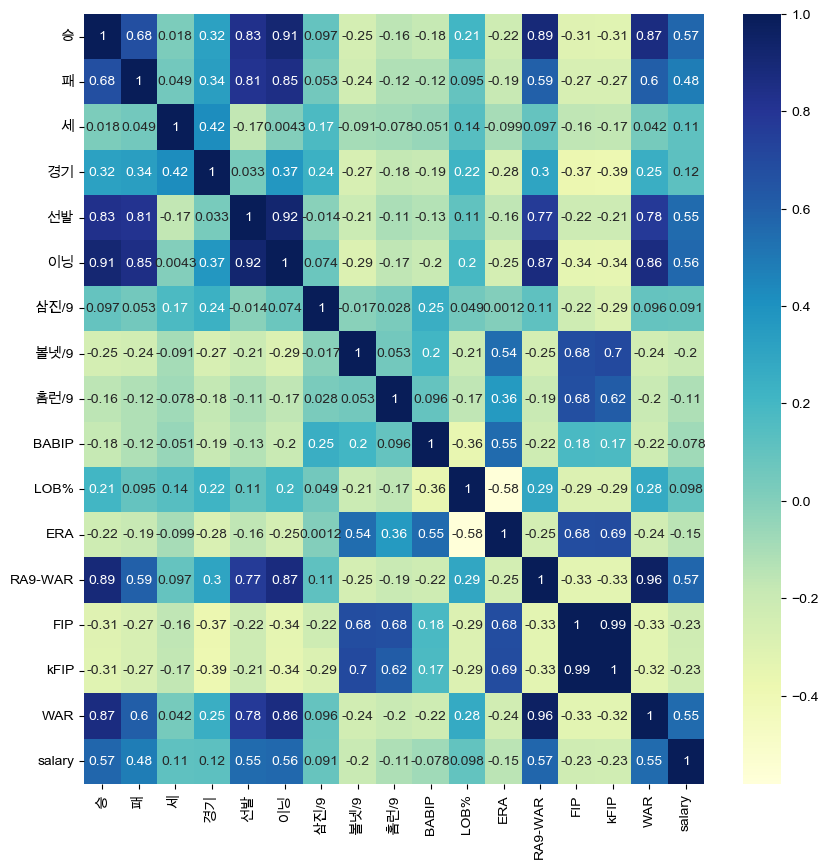

In [33]:
plt.figure(figsize=(10, 10))
sns.heatmap(final_df.corr(), cmap='YlGnBu', annot=True)
plt.show();

- salary와의 관계를 볼 것이기 때문에 salary 기준 다른 feature들간의 상관관계 확인

In [34]:
corr_matrix = final_df.corr()

corr_matrix['salary'].sort_values(ascending=False)

salary     1.000000
RA9-WAR    0.569931
승          0.569692
이닝         0.564537
WAR        0.554998
선발         0.553588
패          0.484159
경기         0.122419
세          0.113838
LOB%       0.098500
삼진/9       0.090735
BABIP     -0.077771
홈런/9      -0.113922
ERA       -0.149471
볼넷/9      -0.197654
FIP       -0.228024
kFIP      -0.233412
Name: salary, dtype: float64

- 절댓값 기준 높은 feature들 순으로 나열

In [35]:
abs(corr_matrix['salary']).sort_values(ascending=False)

salary     1.000000
RA9-WAR    0.569931
승          0.569692
이닝         0.564537
WAR        0.554998
선발         0.553588
패          0.484159
kFIP       0.233412
FIP        0.228024
볼넷/9       0.197654
ERA        0.149471
경기         0.122419
홈런/9       0.113922
세          0.113838
LOB%       0.098500
삼진/9       0.090735
BABIP      0.077771
Name: salary, dtype: float64

## 히스토그램
- 모든 feature의 histogram 확인

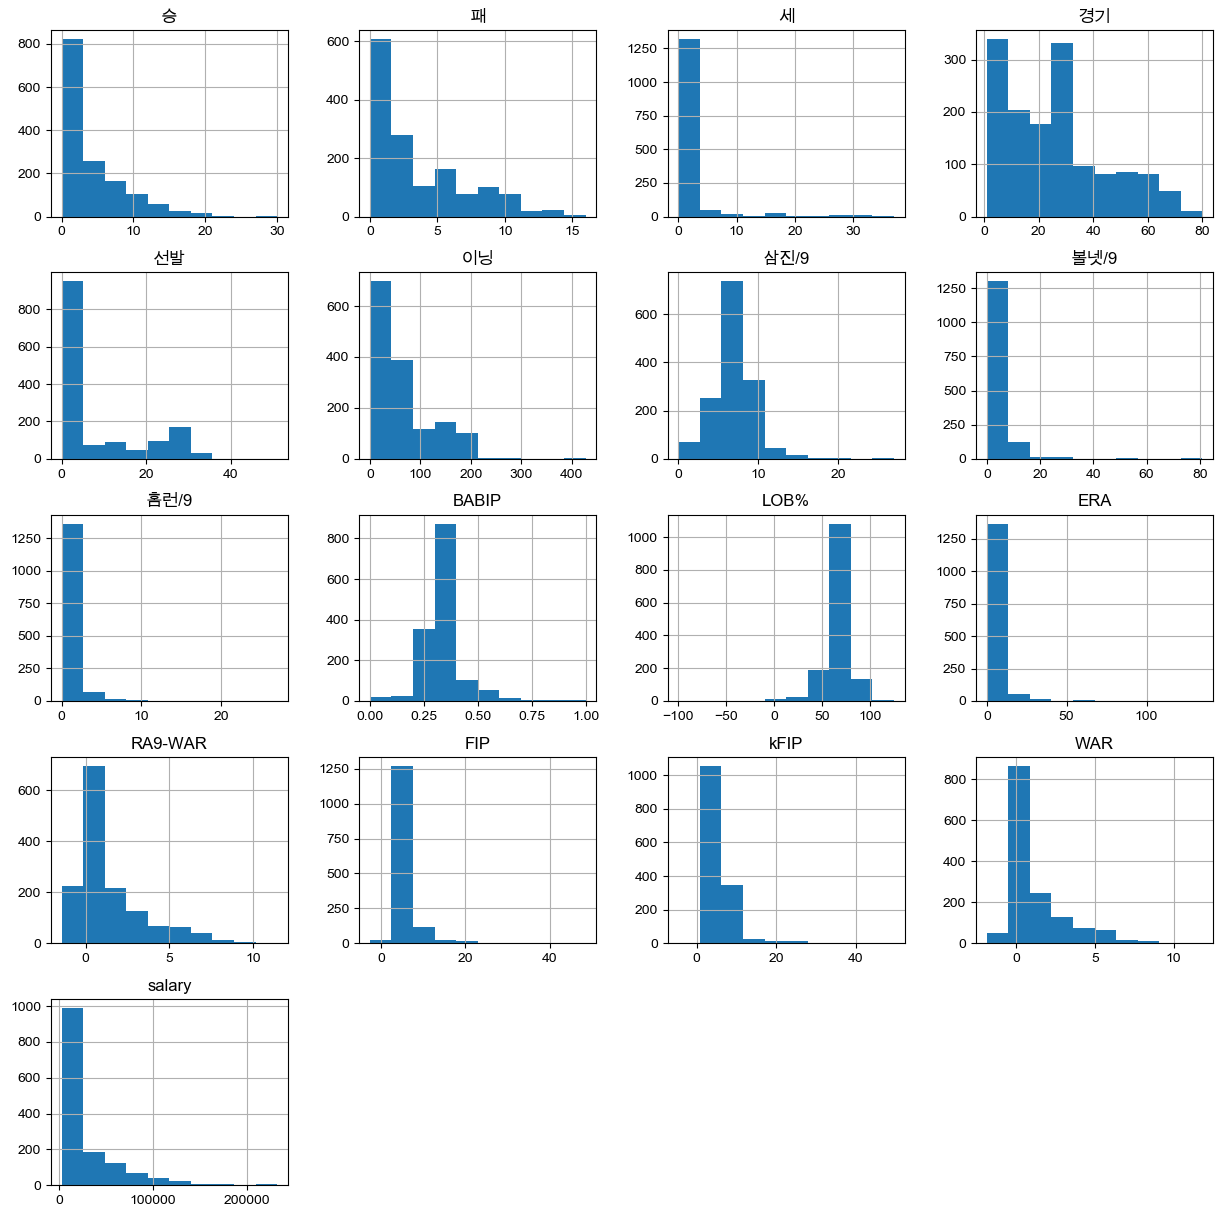

In [36]:
final_df.hist(bins=10, figsize=(15, 15))
plt.show()

## target(salary) 데이터 확인

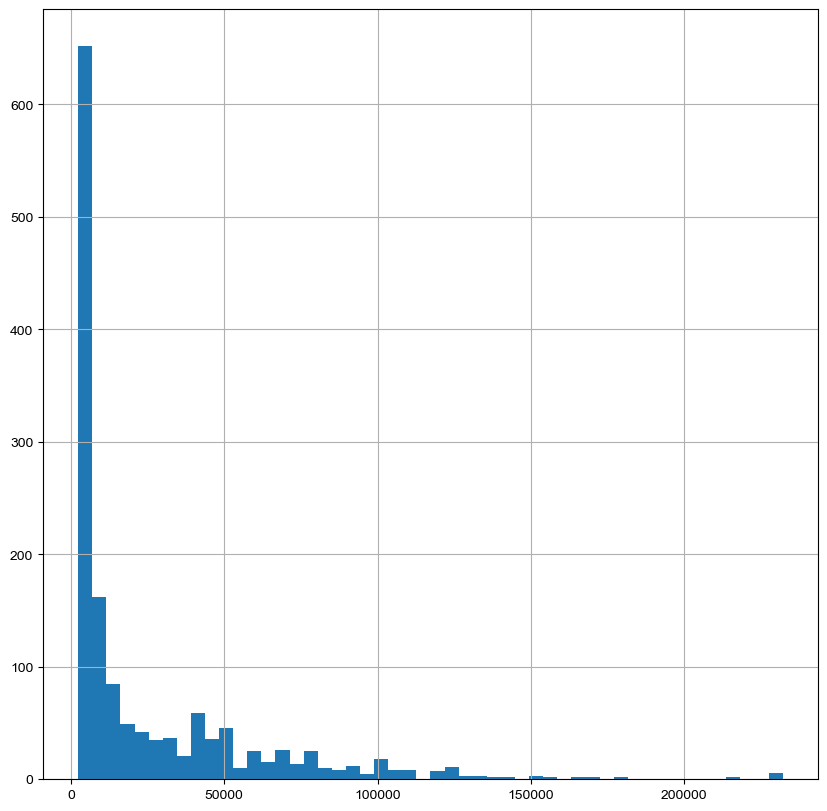

In [37]:
target_df = final_df['salary']

target_df.hist(bins=50, figsize=(10,10))
plt.show()

# 5. 모델 훈련 및 예측
1. 스케일링 없이 훈련
2. 스케일링 후 훈련(pipeline)
3. 그리드 서치
4. feature 조정
5. 최동원 선수 연봉 예측

In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

#### 성능지표 함수

In [134]:
def get_reg_eval(y_test, pred) :
    mse = mean_squared_error(y_test, pred)
    r2 = r2_score(y_test, pred)

    return mse, r2

#### 모델과 데이터를 전달하면 성능을 출력하는 함수

In [135]:
def get_result(model, x_train, y_train, x_test, y_test) :
    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    return get_reg_eval(y_test, pred)

#### 여러 모델의 성능을 dataframe으로 정리하는 함수

In [136]:
def get_result_pd(models, model_names, x_train, y_train, x_test, y_test) :
    col_names = ['mse', 'r2']
    tmp = []

    for model in models :
        tmp.append(get_result(model, x_train, y_train, x_test, y_test))

    return pd.DataFrame(tmp, columns=col_names, index=model_names)

## 1) 스케일링 없이 훈련

In [137]:
final_df.head(2)

,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,salary
0,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.73,26569.62
1,0,0,0,8,1,19.7,2.75,5.95,0.46,0.329,74.5,5.03,-0.08,4.99,4.92,-0.21,35784.00


### 데이터 분할

In [152]:
x = final_df.drop(['salary'], axis=1)
y = final_df['salary']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=13)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1164, 16), (291, 16), (1164,), (291,))

In [139]:
x_train.columns

Index(['승', '패', '세', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP',
       'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR'],
      dtype='object')

### 모델 훈련

In [140]:
# linear regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# decision tree regression
dt_reg = DecisionTreeRegressor(random_state=13)
dt_reg.fit(x_train, y_train)

# random forest regression
rf_reg = RandomForestRegressor(random_state=13)
rf_reg.fit(x_train, y_train)

# xgboost regression
xgb_reg = XGBRegressor(random_state=13)
xgb_reg.fit(x_train, y_train)

# lightgbm regression
lgbm_reg = LGBMRegressor(random_state=13)
lgbm_reg.fit(x_train, y_train)

LGBMRegressor(random_state=13)

### 성능지표 확인

In [141]:
models = [lin_reg, dt_reg, rf_reg, xgb_reg, lgbm_reg]
model_names = ['LinearReg', 'DecisionTreeReg', 'RandomForestReg', 'XGBReg', 'LGBMReg']

results = get_result_pd(models, model_names, x_train, y_train, x_test, y_test)

results

,mse,r2
LinearReg,8.215293e+08,0.335156
DecisionTreeReg,7.781666e+08,0.370249
RandomForestReg,4.433629e+08,0.641197
XGBReg,4.128423e+08,0.665897
LGBMReg,4.718078e+08,0.618178


- RandomForest Regression 모델의 salary에 대한 feature들의 설명력(r2)이 가장 높다.
- 이 데이터셋에서는 decision tree, linear regression 모델이 좋은 성능을 내지는 못하는 듯 하다.

## 2) 스케일링 후 훈련(pipeline)

### pipeline 구축

In [108]:
# LinearReg
lin_reg_estimators = [('scaler', StandardScaler()),
                      ('LinearReg', LinearRegression())]

lin_reg_pipe = Pipeline(lin_reg_estimators)

# DecisionTreeReg
dt_reg_estimators = [('scaler', StandardScaler()),
                      ('DecisionTreeReg', DecisionTreeRegressor())]

dt_reg_pipe = Pipeline(dt_reg_estimators)

# RandomForestReg
rf_reg_estimators = [('scaler', StandardScaler()),
                      ('RandomForestReg', RandomForestRegressor())]

rf_reg_pipe = Pipeline(rf_reg_estimators)

# XGBReg
xgb_reg_estimators = [('scaler', StandardScaler()),
                      ('XGBReg', XGBRegressor())]

xgb_reg_pipe = Pipeline(xgb_reg_estimators)

# LGBMReg
lgbm_reg_estimators = [('scaler', StandardScaler()),
                      ('LGBMReg', LGBMRegressor())]

lgbm_reg_pipe = Pipeline(lgbm_reg_estimators)

### 모델 훈련

In [109]:
lin_reg_pipe.fit(x_train, y_train)
dt_reg_pipe.fit(x_train, y_train)
rf_reg_pipe.fit(x_train, y_train)
xgb_reg_pipe.fit(x_train, y_train)
lgbm_reg_pipe.fit(x_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000237 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2794
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 16
[LightGBM] [Info] Start training from score 25525.867337


Pipeline(steps=[('scaler', StandardScaler()), ('LGBMReg', LGBMRegressor())])

### 성능 지표 확인

In [110]:
models = [lin_reg_pipe, dt_reg_pipe, rf_reg_pipe, xgb_reg_pipe, lgbm_reg_pipe]
model_names = ['LinearReg_Scaled', 'DecisionTreeReg_Scaled', 'RandomForestReg_Scaled', 'XGBReg_Scaled', 'LGBMReg_Scaled']

results = get_result_pd(models, model_names, x_train, y_train, x_test, y_test)

results

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000276 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2794
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 16
[LightGBM] [Info] Start training from score 25525.867337


,mse,r2
LinearReg_Scaled,8.215293e+08,0.335156
DecisionTreeReg_Scaled,7.707364e+08,0.376262
RandomForestReg_Scaled,4.271797e+08,0.654294
XGBReg_Scaled,4.128423e+08,0.665897
LGBMReg_Scaled,4.479952e+08,0.637448


- scaling된 데이터로 훈련 시 성능에 큰 변화가 없다.

## 3) 그리드 서치

- 성능이 높았던 Random Forest, XGBoost, LGBM 모델 위주로 그리드 서치를 진행

### RandomForest

In [113]:
params = {
    'max_depth' : [6, 8, 10, 20],
    'n_estimators' : [50, 100, 200, 400],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

rf_reg = RandomForestRegressor(random_state=13, n_jobs=-1)
rf_grid_cv = GridSearchCV(rf_reg, param_grid=params, cv=5, n_jobs=-1)
rf_grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=13),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 20],
                         'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200, 400]})

In [114]:
rf_grid_cv.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=8, min_samples_split=8,
                      n_estimators=50, n_jobs=-1, random_state=13)

#### 모델 예측

In [115]:
pred = rf_grid_cv.best_estimator_.predict(x_test)

mse, r2 = get_reg_eval(y_test, pred)

print("RandomForestRegressor")
print("MSE : ", mse)
print("R2 score : ", r2)

RandomForestRegressor
MSE :  602836931.2154938
R2 score :  0.5121388444519646


### XGBoost

In [121]:
params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

xgb_reg = XGBRegressor(random_state=13, n_jobs=-1, verbosity=0)
xgb_grid_cv = GridSearchCV(xgb_reg, param_grid=params, cv=5, n_jobs=-1)
xgb_grid_cv.fit(x_train, y_train);

In [122]:
xgb_grid_cv.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=None, min_samples_leaf=8, min_samples_split=8,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=200, n_jobs=-1, ...)

#### 모델 예측

In [143]:
pred = xgb_grid_cv.best_estimator_.predict(x_test)

mse, r2 = get_reg_eval(y_test, pred)

print("XGBoostRegressor")
print("MSE : ", mse)
print("R2 score : ", r2)

XGBoostRegressor
MSE :  517084858.9072721
R2 score :  0.5815358951644616


### LGBM

In [118]:
params = {
    'max_depth' : [6, 8, 10],
    'n_estimators' : [50, 100, 200, 400],
    'min_samples_leaf' : [8, 12],
    'min_samples_split' : [8, 12]
}

lgbm_reg = LGBMRegressor(random_state=13, n_jobs=-1, verbose=-1)
lgbm_grid_cv = GridSearchCV(lgbm_reg, param_grid=params, cv=5, n_jobs=-1)
lgbm_grid_cv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=LGBMRegressor(n_jobs=-1, random_state=13, verbose=-1),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10], 'min_samples_leaf': [8, 12],
                         'min_samples_split': [8, 12],
                         'n_estimators': [50, 100, 200, 400]})

In [119]:
lgbm_grid_cv.best_estimator_

LGBMRegressor(max_depth=6, min_samples_leaf=8, min_samples_split=8,
              n_estimators=400, n_jobs=-1, random_state=13, verbose=-1)

#### 모델 예측

In [144]:
pred = lgbm_grid_cv.best_estimator_.predict(x_test)

mse, r2 = get_reg_eval(y_test, pred)

print("LightGBMRegressor")
print("MSE : ", mse)
print("R2 score : ", r2)

LightGBMRegressor
MSE :  389262745.91888547
R2 score :  0.6849791988475507


## 4. feature 조정

- 위에서 확인했던 상관관계 지수가 0.4 이상인 것들로만 다시 훈련 후 예측

In [148]:
abs(corr_matrix['salary']).sort_values(ascending=False)

salary     1.000000
RA9-WAR    0.569931
승          0.569692
이닝         0.564537
WAR        0.554998
선발         0.553588
패          0.484159
kFIP       0.233412
FIP        0.228024
볼넷/9       0.197654
ERA        0.149471
경기         0.122419
홈런/9       0.113922
세          0.113838
LOB%       0.098500
삼진/9       0.090735
BABIP      0.077771
Name: salary, dtype: float64

### 데이터 분할

In [149]:
x = final_df.drop(['salary', 'kFIP', 'FIP', '볼넷/9', 'ERA', '경기', 'LOB%', '세', '삼진/9', '홈런/9', 'BABIP'], axis=1)
y = final_df['salary']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2,
                                                    random_state=13)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1164, 6), (291, 6), (1164,), (291,))

### 모델 훈련

In [150]:
# linear regression
lin_reg_pre = LinearRegression()
lin_reg_pre.fit(x_train, y_train)

# decision tree regression
dt_reg_pre = DecisionTreeRegressor(random_state=13)
dt_reg_pre.fit(x_train, y_train)

# random forest regression
rf_reg_pre = RandomForestRegressor(random_state=13)
rf_reg_pre.fit(x_train, y_train)

# xgboost regression
xgb_reg_pre = XGBRegressor(random_state=13)
xgb_reg_pre.fit(x_train, y_train)

# lightgbm regression
lgbm_reg_pre = LGBMRegressor(random_state=13)
lgbm_reg_pre.fit(x_train, y_train)

LGBMRegressor(random_state=13)

### 성능 지표 확인

In [151]:
models = [lin_reg_pre, dt_reg_pre, rf_reg_pre, xgb_reg_pre, lgbm_reg_pre]
model_names = ['LinearReg', 'DecisionTreeReg', 'RandomForestReg', 'XGBReg', 'LGBMReg']

results = get_result_pd(models, model_names, x_train, y_train, x_test, y_test)

results

,mse,r2
LinearReg,8.823731e+08,0.285917
DecisionTreeReg,1.224729e+09,0.008856
RandomForestReg,5.916377e+08,0.521202
XGBReg,5.703101e+08,0.538462
LGBMReg,6.830778e+08,0.447202


- 오히려 점수가 떨어졌다.
- feature에 대한 값들이 잘못 입력되었거나, 스케일링이 필요하거나, 상관관계가 0.4이하더라도 필요한 feature가 있는듯하다.

## 5) 최동원 선수 연봉 예측

In [128]:
# 최동원 선수 데이터
prediction_pitcher_salary

,선수명,팀명,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,year,salary
0,최동원,롯데,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.73,1988,26569.62
2,최동원,롯데,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.14,1987,28476.36
3,최동원,롯데,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.20,1.49,11.84,1986,26673.30
4,최동원,롯데,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.43,1985,25041.60
5,최동원,롯데,27,13,6,51,42,284.7,7.05,2.15,0.57,0.267,77.0,2.40,6.18,1.99,2.25,8.43,1984,10401.00
7,최동원,롯데,9,16,4,38,29,208.7,6.38,2.20,0.73,0.297,72.5,2.89,2.45,2.29,2.53,5.43,1983,10638.00


- 모델 input에 맞게 컬럼 수정

In [129]:
prediction_pitcher_salary = prediction_pitcher_salary.sort_values(by='year')

prediction_pitcher_salary = prediction_pitcher_salary[['승', '패', '세', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9', 'BABIP',
       'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR']]

prediction_pitcher_salary

,승,패,세,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR
7,9,16,4,38,29,208.7,6.38,2.20,0.73,0.297,72.5,2.89,2.45,2.29,2.53,5.43
5,27,13,6,51,42,284.7,7.05,2.15,0.57,0.267,77.0,2.40,6.18,1.99,2.25,8.43
4,20,9,8,42,35,225.0,6.44,1.64,0.28,0.257,76.0,1.92,7.33,1.56,1.79,9.43
3,19,14,2,39,21,267.0,7.01,1.85,0.24,0.268,80.3,1.55,9.01,1.20,1.49,11.84
2,14,12,2,32,25,224.0,6.55,2.45,0.24,0.318,74.2,2.81,4.78,1.96,2.24,8.14
0,7,3,3,16,4,83.3,8.96,2.59,0.43,0.317,80.9,2.05,2.51,1.48,2.00,3.73


- 최동원 선수의 1983~1988년도 투수 기록 증진에 따른 5개년도 예측값의 평균을 내어 확인

- 가장 성능이 좋았던 그리드 서치를 활용한 lgbm_grid_cv.best_estimator_로 예측

In [146]:
lgbm_pred = lgbm_grid_cv.best_estimator_.predict(prediction_pitcher_salary)

print("최동원 선수 예측 연봉 : ", int(np.mean(lgbm_pred)*10000), '원')

최동원 선수 예측 연봉 :  329562595 원


- 약 3억 3천만원으로 예측하였다.

- 그 다음으로 성능이 좋았던 모든 하이퍼파라미터를 default로 훈련했던 xgb_reg 모델로 예측

In [153]:
pred = xgb_reg.predict(prediction_pitcher_salary)

print("최동원 선수 예측 연봉 : ", int(np.mean(pred)*10000), '원')

최동원 선수 예측 연봉 :  410446367 원


- 약 4억 1천만원으로 예측했다.

### 결론 : 1980년대에 선수 생활을 했던 최동원 선수가 2020년대 선수였다면 연봉은 약 3억3천 ~ 4억원 사이 일 것으로 예측